<a href="https://colab.research.google.com/github/Astitwa-Agarwal/Machine_Learning/blob/master/Deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import numpy as np

In [0]:
from tensorflow import keras

In [0]:
import matplotlib.pyplot as plt

In [0]:
z = np.linspace(-5, 5, 200)

In [0]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


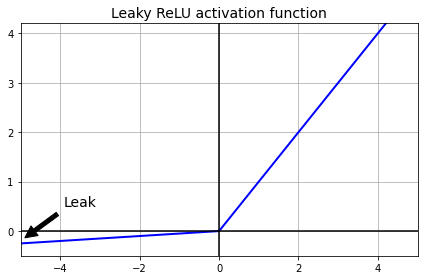

In [285]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [286]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [287]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [288]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [292]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5157 - val_accuracy:

In [0]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


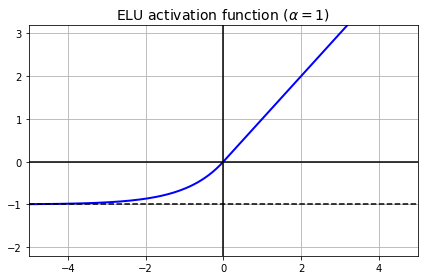

In [294]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [0]:
from scipy.special import erfc
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)


In [0]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


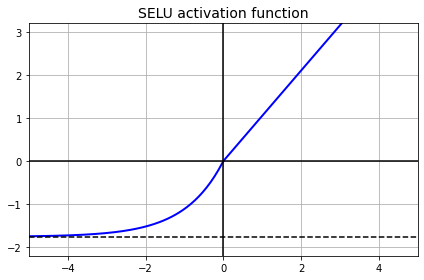

In [297]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [298]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) 
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) 
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [299]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [0]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [304]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 21s 12ms/step - loss: 1.1443 - accuracy: 0.5659 - val_loss: 0.7506 - val_accuracy: 0.7396
Epoch 2/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.7053 - accuracy: 0.7490 - val_loss: 0.6196 - val_accuracy: 0.7786
Epoch 3/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.6105 - accuracy: 0.7781 - val_loss: 0.5958 - val_accuracy: 0.7906
Epoch 4/5
1719/1719 [==============================] - 20s 12ms/step - loss: 0.5915 - accuracy: 0.7897 - val_loss: 0.6093 - val_accuracy: 0.7866
Epoch 5/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5307 - accuracy: 0.8133 - val_loss: 0.4888 - val_accuracy: 0.8248


In [0]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [306]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_38 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 784)               3136      
_________________________________________________________________
dense_647 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_25 (Batc (None, 300)               1200      
_________________________________________________________________
dense_648 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_26 (Batc (None, 100)               400       
_________________________________________________________________
dense_649 (Dense)            (None, 10)              

In [307]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_24/gamma:0', True),
 ('batch_normalization_24/beta:0', True),
 ('batch_normalization_24/moving_mean:0', False),
 ('batch_normalization_24/moving_variance:0', False)]

In [308]:
bn1.updates

[<tf.Operation 'cond_8/Identity' type=Identity>,
 <tf.Operation 'cond_9/Identity' type=Identity>]

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [310]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5754 - accuracy: 0.8030 - val_loss: 0.4725 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5190 - accuracy: 0.8204 - val_loss: 0.4375 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4827 - accuracy: 0.8325 - val_loss: 0.4153 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4565 - accuracy: 0.8408 - val_loss: 0.3998 - val_accuracy: 0.8646
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4398 - accuracy: 0.8473 - val_loss: 0.3868 - val_accuracy: 0.8698
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4242 - accuracy: 0.8515 - val_loss: 0.3765 - val_accuracy:

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [313]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5447 - accuracy: 0.8192 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5109 - accuracy: 0.8279 - val_loss: 0.4434 - val_accuracy: 0.8532
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4263 - val_accuracy: 0.8546
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4712 - accuracy: 0.8397 - val_loss: 0.4130 - val_accuracy:

In [0]:
oprimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer = keras.optimizers.SGD(clipnorm=1.0)

In [0]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) 
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 
    y_B = (y[y_5_or_6] == 6).astype(np.float32) 
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [316]:
X_train_A.shape

(43986, 28, 28)

In [317]:
X_train_B.shape

(200, 28, 28)

In [318]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [319]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [0]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [323]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5926 - accuracy: 0.8103 - val_loss: 0.3890 - val_accuracy: 0.8677
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3013 - val_accuracy: 0.8991
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2972 - accuracy: 0.8974 - val_loss: 0.2892 - val_accuracy: 0.9013
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9022 - val_loss: 0.2774 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9063 - val_loss: 0.2733 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2720 - val_accuracy:

In [0]:
model_A.save("my_model_A.h5")

In [0]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [0]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [327]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 23ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 53ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [328]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_39 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 784)               3136      
_________________________________________________________________
dense_650 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_28 (Batc (None, 300)               1200      
_________________________________________________________________
activation_8 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_651 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_29 (Batc (None, 100)             

In [0]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [0]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [0]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [332]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 23ms/step - loss: 0.5759 - accuracy: 0.6550 - val_loss: 0.5812 - val_accuracy: 0.6379
Epoch 2/4
7/7 [==============================] - 0s 11ms/step - loss: 0.5396 - accuracy: 0.6750 - val_loss: 0.5439 - val_accuracy: 0.6826
Epoch 3/4
7/7 [==============================] - 0s 11ms/step - loss: 0.5029 - accuracy: 0.7250 - val_loss: 0.5121 - val_accuracy: 0.7150
Epoch 4/4
7/7 [==============================] - 0s 11ms/step - loss: 0.4716 - accuracy: 0.7550 - val_loss: 0.4835 - val_accuracy: 0.7333
Epoch 1/16
7/7 [==============================] - 0s 22ms/step - loss: 0.3938 - accuracy: 0.8150 - val_loss: 0.3452 - val_accuracy: 0.8641
Epoch 2/16
7/7 [==============================] - 0s 11ms/step - loss: 0.2787 - accuracy: 0.9350 - val_loss: 0.2600 - val_accuracy: 0.9270
Epoch 3/16
7/7 [==============================] - 0s 12ms/step - loss: 0.2079 - accuracy: 0.9650 - val_loss: 0.2111 - val_accuracy: 0.9554
Epoch 4/16
7/7 [===============

In [333]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9705


[0.14084088802337646, 0.9704999923706055]

In [334]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9930


[0.06821806728839874, 0.9929999709129333]

In [0]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [337]:
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4855 - accuracy: 0.8305 - val_loss: 0.4029 - val_accuracy: 0.8596
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8660 - val_loss: 0.3716 - val_accuracy: 0.8728
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3458 - accuracy: 0.8769 - val_loss: 0.3752 - val_accuracy: 0.8752
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3251 - accuracy: 0.8829 - val_loss: 0.3502 - val_accuracy: 0.8800
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.8889 - val_loss: 0.3449 - val_accuracy: 0.8780
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2966 - accuracy: 0.8934 - val_loss: 0.3414 - val_accuracy: 0.8824
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2868 - accuracy: 0.8972 - val_loss: 0.3358 - val_accuracy:

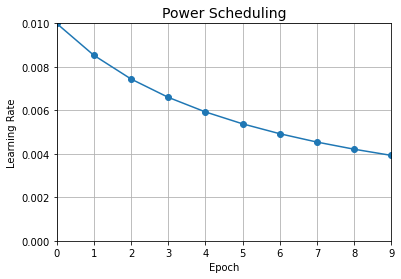

In [338]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [0]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [0]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 15

In [342]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9094 - accuracy: 0.7370 - val_loss: 1.0208 - val_accuracy: 0.7344 - lr: 0.0100
Epoch 2/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6804 - accuracy: 0.7919 - val_loss: 0.5537 - val_accuracy: 0.8258 - lr: 0.0089
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6126 - accuracy: 0.8146 - val_loss: 0.7158 - val_accuracy: 0.8138 - lr: 0.0079
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5616 - accuracy: 0.8316 - val_loss: 0.6111 - val_accuracy: 0.8304 - lr: 0.0071
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4928 - accuracy: 0.8458 - val_loss: 0.5208 - val_accuracy: 0.8460 - lr: 0.0063
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4425 - accuracy: 0.8595 - val_loss: 0.4892 - val_accuracy: 0.8552 - lr: 0.0056
Epoch 7/15
1719/1719 [==============================] - 7s

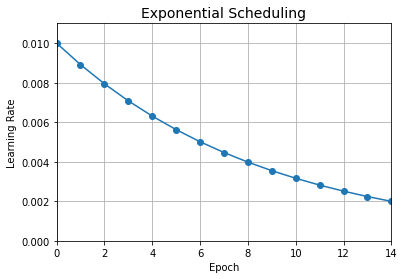

In [343]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [0]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [345]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8274 - accuracy: 0.7604 - val_loss: 0.8279 - val_accuracy: 0.7552 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6382 - accuracy: 0.8036 - val_loss: 0.5874 - val_accuracy: 0.8024 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5758 - accuracy: 0.8211 - val_loss: 0.7977 - val_accuracy: 0.7764 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5196 - accuracy: 0.8369 - val_loss: 0.5043 - val_accuracy: 0.8566 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4682 - accuracy: 0.8526 - val_loss: 0.5289 - val_accuracy: 0.8594 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4489 - accuracy: 0.8622 - val_loss: 0.4646 - val_accuracy: 0.8660 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8s

In [0]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

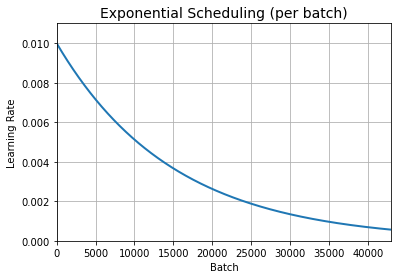

In [347]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

In [0]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [0]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [350]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8524 - accuracy: 0.7559 - val_loss: 0.9752 - val_accuracy: 0.7090 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8640 - accuracy: 0.7428 - val_loss: 0.6138 - val_accuracy: 0.8072 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8610 - accuracy: 0.7478 - val_loss: 1.4423 - val_accuracy: 0.6284 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9943 - accuracy: 0.6765 - val_loss: 0.9379 - val_accuracy: 0.6768 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8587 - accuracy: 0.7002 - val_loss: 0.8857 - val_accuracy: 0.7486 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6166 - accuracy: 0.7880 - val_loss: 0.7018 - val_accuracy: 0.8118 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8s

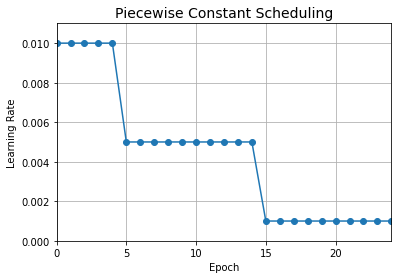

In [351]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [0]:
tf.random.set_seed(42)
np.random.seed(42)

In [353]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5921 - accuracy: 0.8060 - val_loss: 0.4477 - val_accuracy: 0.8558 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4974 - accuracy: 0.8396 - val_loss: 0.6120 - val_accuracy: 0.8360 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5222 - accuracy: 0.8407 - val_loss: 0.5312 - val_accuracy: 0.8520 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4898 - accuracy: 0.8504 - val_loss: 0.4545 - val_accuracy: 0.8526 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5264 - accuracy: 0.8473 - val_loss: 0.4999 - val_accuracy: 0.8416 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8561 - val_loss: 0.5358 - val_accuracy: 0.8566 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 4s

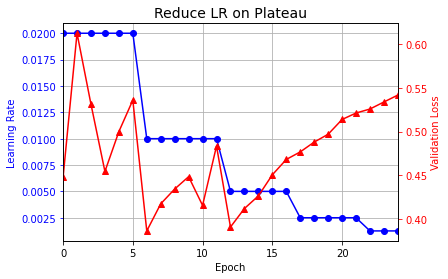

In [354]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [355]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4894 - accuracy: 0.8275 - val_loss: 0.4094 - val_accuracy: 0.8600
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3820 - accuracy: 0.8652 - val_loss: 0.3739 - val_accuracy: 0.8694
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3487 - accuracy: 0.8766 - val_loss: 0.3731 - val_accuracy: 0.8688
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3264 - accuracy: 0.8836 - val_loss: 0.3492 - val_accuracy: 0.8800
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.8898 - val_loss: 0.3430 - val_accuracy: 0.8792
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8951 - val_loss: 0.3414 - val_accuracy: 0.8818
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2855 - accuracy: 0.8989 - val_loss: 0.3355 - val_accuracy:

In [0]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

In [0]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [0]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.3862


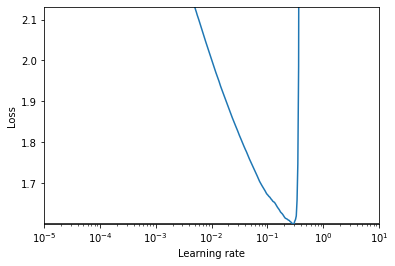

In [359]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [0]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [361]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 5ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8338
Epoch 2/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4273 - val_accuracy: 0.8522
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4121 - accuracy: 0.8546 - val_loss: 0.4115 - val_accuracy: 0.8586
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.3868 - val_accuracy: 0.8686
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3639 - accuracy: 0.8716 - val_loss: 0.3765 - val_accuracy: 0.8682
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3457 - accuracy: 0.8773 - val_loss: 0.3744 - val_accuracy: 0.8706
Epoch 7/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3330 - accuracy: 0.8809 - val_loss: 0.3636 - val_accuracy: 0.8718
Epoch 

In [0]:
layer=keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.001))

In [364]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [365]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6313 - accuracy: 0.8113 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7187 - accuracy: 0.8273 - val_loss: 0.6826 - val_accuracy: 0.8382


In [369]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5838 - accuracy: 0.7997 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4209 - accuracy: 0.8442 - val_loss: 0.3396 - val_accuracy: 0.8718


In [0]:
tf.random.set_seed(42)
np.random.seed(42)

In [371]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6654 - accuracy: 0.7594 - val_loss: 0.5934 - val_accuracy: 0.8412
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5605 - accuracy: 0.7939 - val_loss: 0.5519 - val_accuracy: 0.8396
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5283 - accuracy: 0.8051 - val_loss: 0.4866 - val_accuracy: 0.8590
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5072 - accuracy: 0.8117 - val_loss: 0.4633 - val_accuracy: 0.8592
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4922 - accuracy: 0.8187 - val_loss: 0.4641 - val_accuracy: 0.8586
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4865 - accuracy: 0.8195 - val_loss: 0.4724 - val_accuracy: 0.8596
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4727 - accuracy: 0.8240 - val_loss: 0.4590 - val_accuracy:

In [372]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8648


[0.44666436314582825, 0.864799976348877]

In [373]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 3s 1ms/step - loss: 0.3318 - accuracy: 0.8873


[0.33179745078086853, 0.8873090744018555]

In [374]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8454


In [0]:
tf.random.set_seed(42)
np.random.seed(42)

In [0]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [378]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [379]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.21, 0.  , 0.62]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.78, 0.  , 0.22]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.29, 0.  , 0.  , 0.  , 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.11, 0.  , 0.86]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.12, 0.  , 0.7 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.41, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.12, 0.  , 0.68]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.24, 0.  , 0.75]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.68, 0.  , 0.04, 0.  , 0.28]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.06, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  , 0.  , 0.  , 0.58]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.79, 0.  , 0.06, 0.  , 0.16]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.08, 0.  , 0

In [380]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.09, 0.  , 0.74]],
      dtype=float32)

In [381]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.24, 0.  , 0.15, 0.  , 0.26]],
      dtype=float32)

In [0]:
y_pred = np.argmax(y_proba, axis=1)

In [385]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [383]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.868

In [0]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [0]:
tf.random.set_seed(42)
np.random.seed(42)
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [0]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [0]:
mc_model.set_weights(model.get_weights())

In [390]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.14, 0.  , 0.68]],
      dtype=float32)

In [0]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [392]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4738 - accuracy: 0.8336 - val_loss: 0.3810 - val_accuracy: 0.8608
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3543 - accuracy: 0.8711 - val_loss: 0.3736 - val_accuracy: 0.8692
